In [40]:
# !pip install seaborn
# !pip install scipy
# !pip install ahrs

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ahrs
from ahrs.common import constants, orientation
import seaborn as sns
from scipy.stats import pearsonr
import pyIMU
import random
import math

In [42]:
random.seed(42)
tf.random.set_seed(42)

# Read GPS data

In [43]:
df_GPS = pd.read_csv('../data/GPSf.txt', sep=' ', header=None) 
df_GPS = df_GPS.iloc[:, :-1]
df_GPS.columns = ['time', 'lat', 'lon', 'height', 'v_n', 'v_e', 'v_u']
df_GPS.head()

,time,lat,lon,height,v_n,v_e,v_u
0,355485.0,21.065119,105.78334,4.8,0.67,0.69,1.9
1,355486.0,21.065119,105.78334,4.8,0.67,0.69,1.9
2,355487.0,21.065119,105.78334,4.9,0.67,0.69,1.9
3,355488.0,21.065119,105.78334,4.9,0.67,0.69,1.9
4,355489.0,21.065119,105.78334,5.0,0.67,0.68,1.9


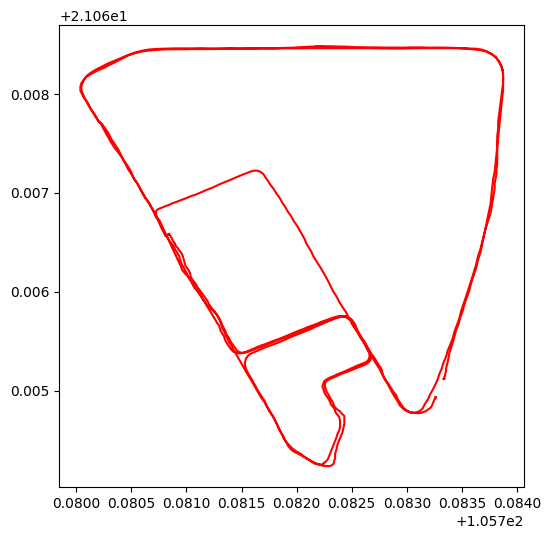

In [44]:
plt.figure(figsize=(6, 6))
plt.plot(df_GPS['lon'], df_GPS['lat'], 'r')

# Read IMU data

In [45]:
df_IMU = pd.read_csv('../data/IMU.txt', delim_whitespace=True, header=None) 
df_IMU.columns = ['time', 'gx', 'gy', 'gz', 'ax', 'ay', 'az']

df_IMU = df_IMU[20000:50000]
df_IMU.head()


C:\Users\dung2\AppData\Local\Temp\ipykernel_9480\1050614986.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_IMU = pd.read_csv('../data/IMU.txt', delim_whitespace=True, header=None)


,time,gx,gy,gz,ax,ay,az
20000,355824.00,-0.006108,-0.002617,0.184132,0.130624,-0.293905,-10.351997
20001,355824.02,-0.003490,0.009599,0.177150,0.130624,-0.032656,-10.286685
20002,355824.04,-0.006108,-0.001745,0.185004,0.195936,-0.097968,-10.188716
20003,355824.06,-0.005235,-0.008726,0.178023,0.163280,-0.097968,-9.829499
20004,355824.08,-0.002617,0.006981,0.188495,0.163280,0.097968,-9.796843


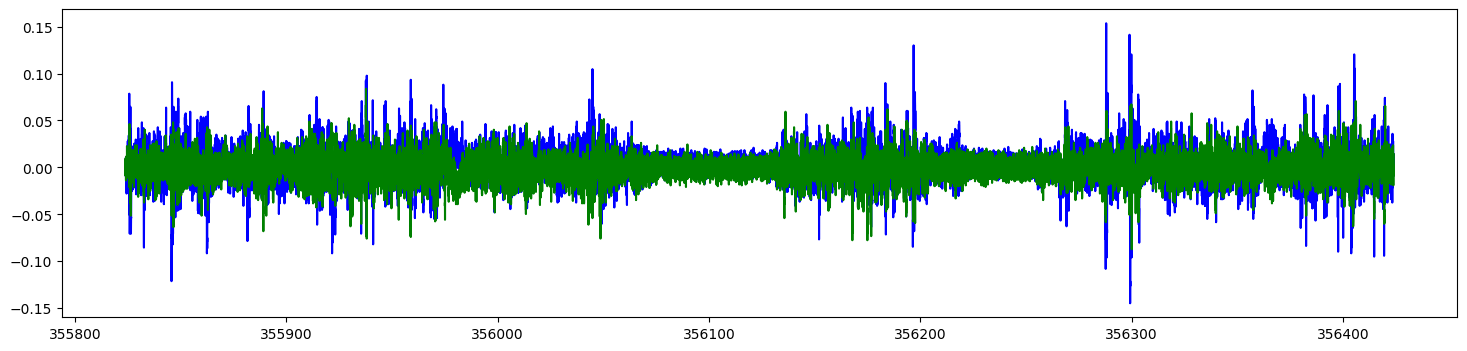

In [46]:
plt.figure(figsize=(18, 4))
plt.plot(df_IMU['time'], df_IMU['gx'], 'b')
plt.plot(df_IMU['time'], df_IMU['gy'], 'g')
# plt.plot(df_IMU['time'], df_IMU['gz'], 'r')

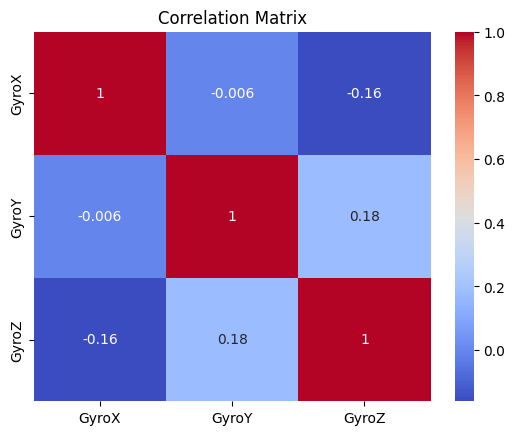

In [47]:
# Calculate correlation matrix
correlation_matrix = df_IMU[['gx', 'gy', 'gz']].corr()

# Visualize correlation using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', 
            xticklabels=['GyroX', 'GyroY', 'GyroZ'], 
            yticklabels=['GyroX', 'GyroY', 'GyroZ'])
plt.title('Correlation Matrix')
plt.show()

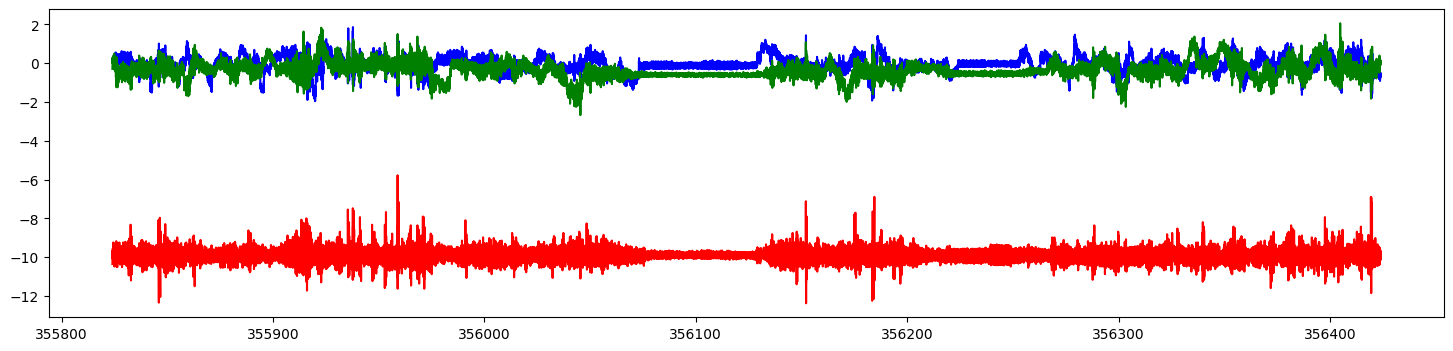

In [48]:
plt.figure(figsize=(18, 4))
plt.plot(df_IMU['time'], df_IMU['ax'], 'b')
plt.plot(df_IMU['time'], df_IMU['ay'], 'g')
plt.plot(df_IMU['time'], df_IMU['az'], 'r')

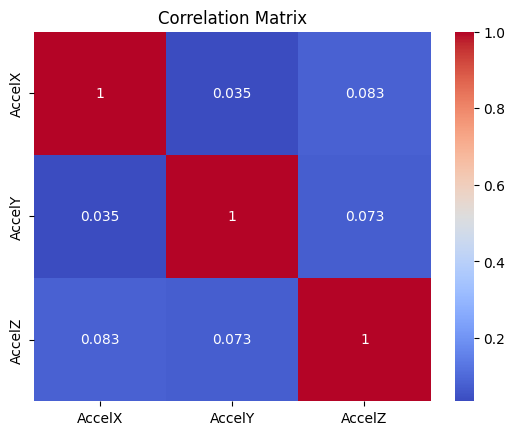

In [49]:
# Calculate correlation matrix
correlation_matrix = df_IMU[['ax', 'ay', 'az']].corr()

# Visualize correlation using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', 
            xticklabels=['AccelX', 'AccelY', 'AccelZ'], 
            yticklabels=['AccelX', 'AccelY', 'AccelZ'])
plt.title('Correlation Matrix')
plt.show()

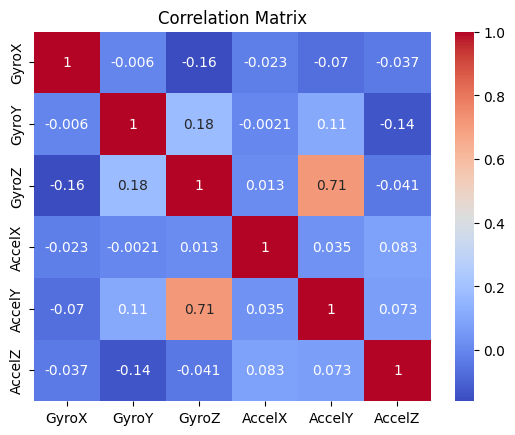

In [50]:
# Calculate correlation matrix
correlation_matrix = df_IMU[['gx', 'gy', 'gz', 'ax', 'ay', 'az']].corr()

# Visualize correlation using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', 
            xticklabels=['GyroX', 'GyroY', 'GyroZ', 'AccelX', 'AccelY', 'AccelZ'], 
            yticklabels=['GyroX', 'GyroY', 'GyroZ', 'AccelX', 'AccelY', 'AccelZ'])
plt.title('Correlation Matrix')
plt.show()

In [51]:
output = pd.read_csv('../data/IMUsol.txt', delim_whitespace=True, header=None)
output.columns = ['time', 'lat', 'lon', 'height', 'v_n', 'v_e', 'v_u', 'roll', 'pitch', 'yaw', 'VACC', 'VACC_', 'HACC', "unknow", 'kalmal_update']
output.head()

C:\Users\dung2\AppData\Local\Temp\ipykernel_9480\1282569857.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  output = pd.read_csv('../data/IMUsol.txt', delim_whitespace=True, header=None)


,time,lat,lon,height,v_n,v_e,v_u,roll,pitch,yaw,VACC,VACC_,HACC,unknow,kalmal_update
0,355424.02,21.065119,105.78334,4.800,-0.00,-0.00,-0.00,1.31,-0.53,-0.004,1.0,1.0,1.0,-0.000,no
1,355424.14,21.065119,105.78334,4.801,-0.00,-0.01,-0.02,1.29,-0.52,0.002,1.0,1.0,1.0,-0.002,no
2,355424.26,21.065119,105.78334,4.804,0.00,-0.01,-0.03,1.29,-0.51,0.014,1.0,1.0,1.0,0.003,no
3,355424.38,21.065119,105.78334,4.809,0.01,-0.02,-0.05,1.30,-0.50,0.023,1.0,1.0,1.0,0.008,no
4,355424.50,21.065119,105.78334,4.817,0.01,-0.02,-0.07,1.31,-0.48,0.023,1.0,1.0,1.0,0.007,no


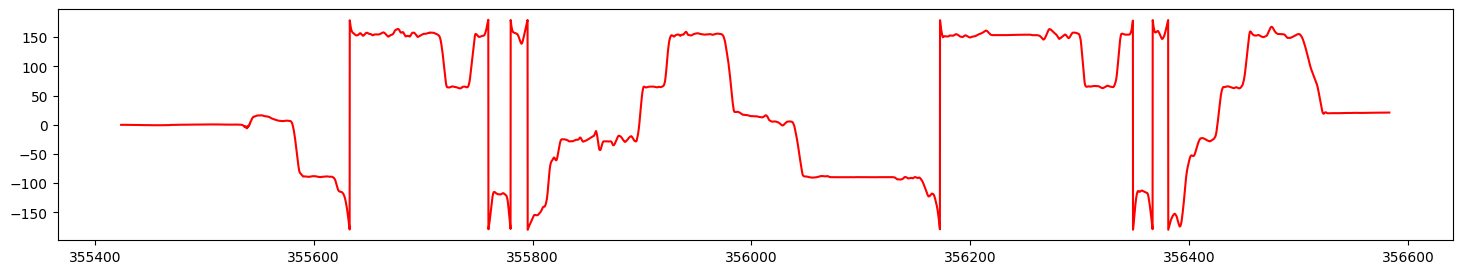

In [52]:
plt.figure(figsize=(18, 3))
# plt.plot(output['time'], output['roll'], 'b')
# plt.plot(output['time'], output['pitch'], 'g')
plt.plot(output['time'], output['yaw'], 'r')

In [112]:
r = [df_GPS['lat'], df_GPS['lon'], df_GPS['height']] 
v = [df_GPS['v_n'], df_GPS['v_e'], df_GPS['v_u']] # velocity in ENU
theta_0 = np.array([random.randint(0, 360), random.randint(0, 360), random.randint(0, 360)])

In [119]:
quat = orientation.am2q(theta_0, None)

AxisError: axisa: axis -1 is out of bounds for array of dimension 0